In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

from sklearn.linear_model import LinearRegression, LogisticRegression
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

%matplotlib inline

In [2]:
df = pd.read_csv('../Processed_Data/prepared.csv', index_col=0)
df.head()

,Company,Location,Job_Title,Subspecialty,Total_Comp,Role
0,Other,San Francisco,Senior Associate,Other,198000.0,Consultant
1,Facebook,Menlo Park,L4,Product,177000.0,Consultant
2,Accenture,San Francisco,Consultant,Other,120000.0,Consultant
3,Salesforce,Atlanta,8,Other,178000.0,Consultant
4,Oracle,San Francisco,IC-4,Consumer,82000.0,Consultant


In [3]:
features = ['Company', 'Location', 'Job_Title', 'Subspecialty', 'Role']
target = 'Total_Comp'
X = pd.get_dummies(df[features], prefix='', prefix_sep='', drop_first=True).values
y = df[target]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [5]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_train)
    # pred = np.exp(pred)
    print('Train R2: {}'.format(r2_score(y_train, pred)))
    print('Train RMSE: {}'.format(np.sqrt(mean_squared_error(y_train, pred))))

    pred = model.predict(X_test)
    # pred = np.exp(pred)
    print('Test R2: {}'.format(r2_score(y_test, pred)))
    print('Test RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, pred))))

In [6]:
lm = LinearRegression()

In [7]:
evaluate_model(lm, X_train, X_test, y_train, y_test)

Train R2: 0.6275235861834796
Train RMSE: 55794.354943017905
Test R2: 0.6019997605914541
Test RMSE: 57433.695605745794


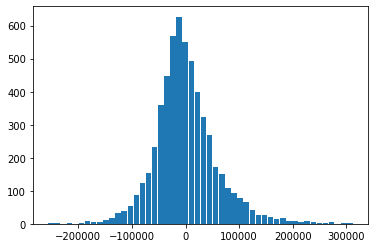

In [8]:
y_pred = lm.predict(X_test)
y_resid = y_test - y_pred
plt.hist(y_resid, bins=50, rwidth=0.9)
plt.show()

In [9]:
xgb = XGBRegressor()

In [10]:
evaluate_model(xgb, X_train, X_test, y_train, y_test)

Train R2: 0.7066360896586934
Train RMSE: 49515.84732702334
Test R2: 0.6384016456426381
Test RMSE: 54744.22577810699


In [11]:
y_pred = xgb.predict(X_test)

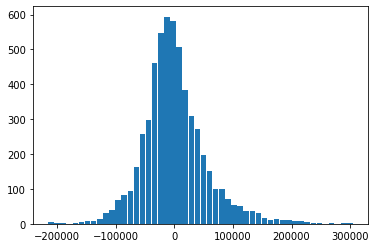

In [12]:
y_resid = y_test - y_pred
plt.hist(y_resid, bins=50, rwidth=0.9)
plt.show()

In [13]:
# def bootstrap_prediction(model, X, y, resids, inpt):
#     PI = []
#     for _ in range(100):
#         sample_index = np.random.choice(range(len(y)), len(y))
#         X_sample = X[sample_index]
#         y_sample = y[sample_index]

#         m = model.fit(X_sample, y_sample)

#         resid = np.random.choice(resids, 1)[0]
#         pred = m.predict([inpt])[0]
#         PI.append(pred + resid)

#     return PI

In [14]:
# sample = X[400]
# t = bootstrap_prediction(lm, X, y, y_resid, sample)

In [15]:
# np.quantile(t, [0.15, 0.85])

<p> Based on marginal model imporvement after several model tests and parameter searches, I will deploy an Ordinary Least Squares (OLS) model for predicting salary. A Bootstrap Prediction Interval Method is provided above, but due to the computational costs, it will not be incorporated in the deployed model. </p>